[Reference](https://medium.com/analytics-vidhya/statistics-visualize-data-using-python-6d23aee7f6d7)

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips") # tips dataset can be loaded from seaborn
sns.get_dataset_names() # to get a list of other available datasets
import plotly.express as px
tips = px.data.tips() # tips dataset can be loaded from plotly
# data_canada = px.data.gapminder().query("country == 'Canada'")
import pandas as pd
tips.to_csv('tips.csv') # we can save the dataset into a csv and then load it into SAS or R for plotting
import altair as alt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Using plotly library
t = tips.groupby(['day','sex']).mean()[['total_bill']].reset_index()
px.scatter(t, x='day', y='total_bill', color='sex', 
        title='Average bill by gender by day', 
        labels={'day':'Day of the week', 'total_bill':'Average Bill in $'})

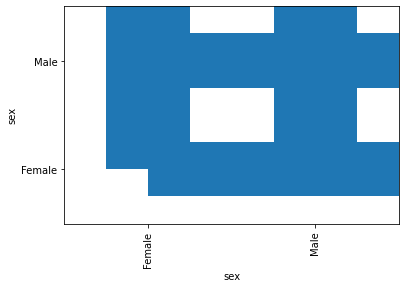

In [4]:
# Using pandas plot
tips.groupby('sex').mean()['total_bill'].plot(kind='bar') 
tips.groupby('sex').mean()['tip'].plot(kind='barh')
# Using plotly
t = tips.groupby(['day','sex']).mean()[['total_bill']].reset_index()
px.bar(t, x='day', y='total_bill') # Using plotly
px.bar(t, x='total_bill', y="day", orientation='h')

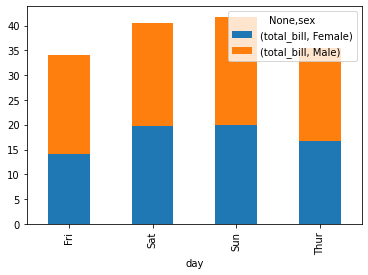

In [5]:
# using pandas plot; kind='barh' for horizontal plot 
# need to unstack one of the levels and fill na values
tips.groupby(['day','sex']).mean()[['total_bill']]\
        .unstack('sex').fillna(0)\
        .plot(kind='bar', stacked=True) 
# Using plotly
t = tips.groupby(['day','sex']).mean()[['total_bill']].reset_index()
px.bar(t, x="day", y="total_bill", color="sex", title="Average bill by Gender and Day") # vertical 
px.bar(t, x="total_bill", y="day", color="sex", title="Average bill by Gender and Day", orientation='h') # horizontal

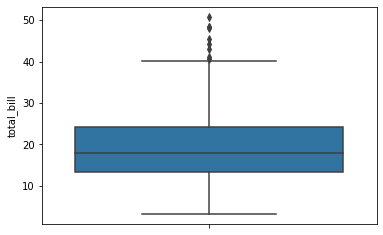

In [6]:
# using pandas plot
# we specify y=variable for vertical and x=variable for horizontal for horizontal box plot respectively
tips[['total_bill']].plot(kind='box') 
# using plotly
px.box(tips, y='total_bill') 
# using seaborn
sns.boxplot(y=tips["total_bill"])

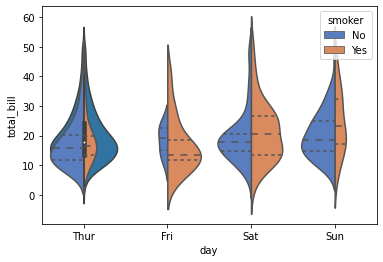

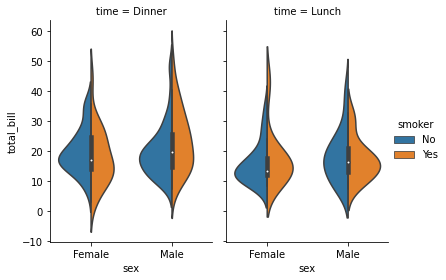

In [7]:
# Using seaborn
sns.violinplot(y=tips.total_bill)
sns.violinplot(data=tips, x='day', y='total_bill', 
        hue='smoker', 
        palette='muted', split=True,
        scale='count', inner='quartile',
        order=['Thur','Fri','Sat','Sun'])
sns.catplot(x='sex', y='total_bill',
        hue='smoker', col='time',
        data=tips, kind='violin', split=True,
        height=4, aspect=.7)

alt.Chart(...)

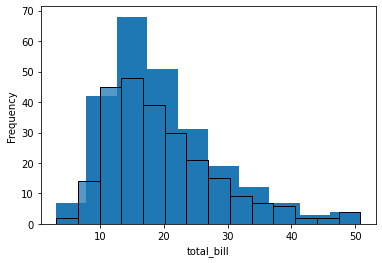

In [8]:
# using pandas plot
tips.total_bill.plot(kind='hist') 
# using plotly
px.histogram(tips, x="total_bill") 
# using seaborn
sns.histplot(data=tips, x="total_bill") 
# using altair
alt.Chart(tips).mark_bar().encode(alt.X('total_bill:Q', bin=True),y='count()')

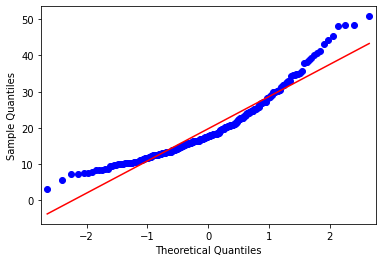

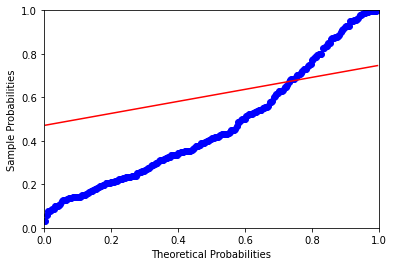

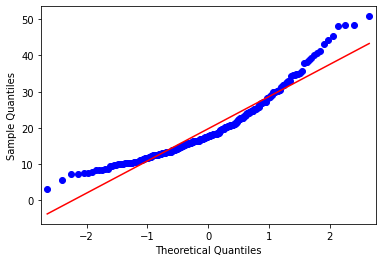

In [9]:
# using statsmodels
import statsmodels.graphics.gofplots as sm 
import numpy as np
sm.ProbPlot(np.array(tips.total_bill)).ppplot(line='s') 
sm.ProbPlot(np.array(tips.total_bill)).qqplot(line='s')

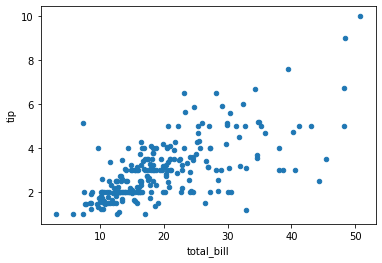

In [10]:
# using plotly
px.scatter(tips, x='total_bill', y='tip', color='sex', size='size', hover_data=['day']) 
# using pandas plot
tips.plot(x='total_bill', y='tip', kind='scatter')

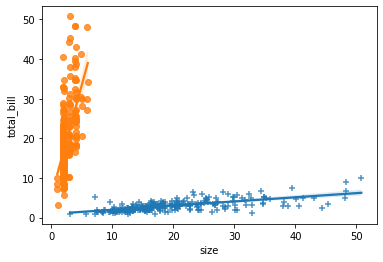

In [11]:
# using seaborn
sns.regplot(x="total_bill", y="tip", data=tips, marker='+') 
# for categorical variables we can add jitter to see overlapping points
sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

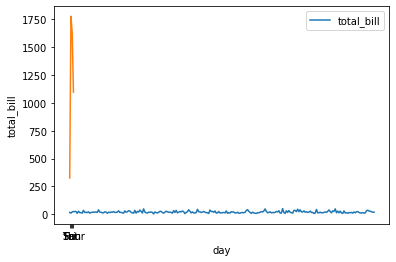

In [12]:
# using pandas plot
tips['total_bill'].plot(kind='line') 
# using plotly
px.line(tips, y='total_bill', title='Total bill') 
t = tips.groupby('day').sum()[['total_bill']].reset_index()
px.line(t, x='day',y='total_bill', title='Total bill by day')
# using altair
alt.Chart(t).mark_line().encode(x='day', y='total_bill') 
# using seaborn
sns.lineplot(data=t, x='day', y='total_bill')

alt.Chart(...)

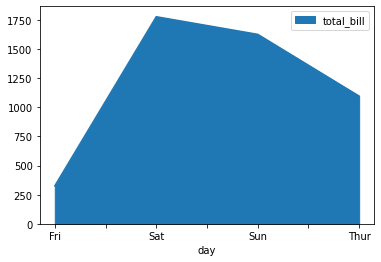

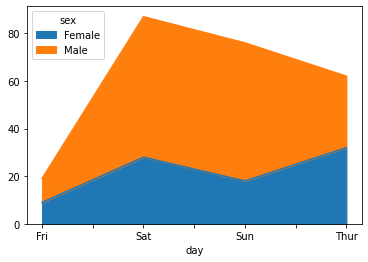

In [13]:
# using pandas plot
tips.groupby('day').sum()[['total_bill']].plot(kind='area') 
# stacked area can be done using pandas.plot as well
t = tips.groupby(['day','sex']).count()[['total_bill']].reset_index()
t_pivoted = t.pivot(index='day', columns='sex', values='total_bill')
t_pivoted.plot.area() 
# using plotly
px.area(t, x='day', y='total_bill', color='sex',line_group='sex') 
# using altair
alt.Chart(t).mark_area().encode(x='day', y='total_bill')

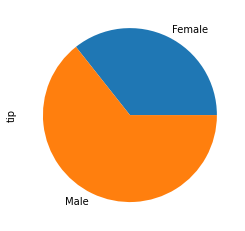

In [14]:
# using pandas plot
tips.groupby('sex').count()['tip'].plot(kind='pie') 
# using plotly
px.pie(tips, values='tip', names='day')

In [15]:
# !pip install plotly==4.8.2

In [16]:
px.sunburst(tips, path=['sex', 'day', 'time'], values='total_bill', color='day')

In [17]:
# using plotly
t = tips.groupby('day').mean()[['total_bill']].reset_index()
px.line_polar(t, r='total_bill', theta='day', line_close=True)